In [1]:
import pandas as pd

df = pd.DataFrame({
    'A': ['a', 'b', 'c', 'a', 'b'],
    'B' : [1,2,3,1,9]    
    })
df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,9


'A' 컬럼의 데이터 값들을 문자열이 아닌 숫자형으로 바꾸고 싶다.

# Label Encoder

In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['A'])

LabelEncoder()

In [3]:
le.classes_ # fit 시킨 le에 'a', 'b', 'c'라는 클래스가 들어있음

array(['a', 'b', 'c'], dtype=object)

In [5]:
le.transform(df['A']) # 변환

array([0, 1, 2, 0, 1])

In [6]:
# 데이터 프레임에 적용

df['le_A'] = le.transform(df['A']) # array([0, 1, 2, 0, 1])
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,9,1


In [7]:
# 위 처럼 fit과 transform을 각각해도 되지만 
# 한 번에 할 수 있다.

le.fit_transform(df['A'])

array([0, 1, 2, 0, 1])

In [8]:
# 기존의 값이 어떻게 바뀌었는지 살펴볼 수 있음
# 이 때 fit되지 않은 값은 에러가 뜸

le.transform(['a'])

array([0])

In [9]:
le.transform(['d'])

ValueError: y contains previously unseen labels: 'd'

In [10]:
le.inverse_transform(df['le_A']) # transfrom되어있는 내용을 다시 문자열로 변환도 가능

array(['a', 'b', 'c', 'a', 'b'], dtype=object)

# Min-Max scaling

주어진 값을 최소값으로 뺀 후 최대값과 최소값의 차이로 이를 나누는 것을 말함

$x'$ = $x - min(x)\over max(x) - min(x)$

이 때 $x - min(x)$ 는 최소값을 0으로 만드는 역할을 하며

$max(x) - min(x)$ 는 크기를 1로 만들어 최대값을 1로 만드는 역할을 한다.

In [11]:
import pandas as pd

df = pd.DataFrame({
    'A': [10,20,-10,0,25],
    'B' : [1,2,3,1,0]    
    })
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [12]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [13]:
# 각 컬럼의 fit된 값을 반환함
# 최대값         최소값          데이터 길이
mms.data_max_ , mms.data_min_ , mms.data_range_

(array([25.,  3.]), array([-10.,   0.]), array([35.,  3.]))

In [14]:
df_mms = mms.transform(df)
df_mms # min-max scaler가 적용된 데이터

# fit과 transform을 한 번에
#mms.fit_transform(df)

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [15]:
# 역변환
mms.inverse_transform(df_mms)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

# Standard scaler

데이터를 표준정규분포 형태로 만들어줌

$Z$ = $X - \mu\over \sigma$

In [16]:
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)

StandardScaler()

In [18]:
# 각 컬럼의 평균과 표준편차
ss.mean_ , ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [19]:
df_ss = ss.transform(df)
df_ss

# fit과 transform을 한 번에
#ss.fit_transform(df)

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [20]:
# 역변환
ss.inverse_transform(df_ss)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

# Robust scaler

$x_i - Q_2\over Q_3 - Q_1$

$x_i - Q_2$ : 데이터의 중앙값을 0으로 만들고

$Q_3 - Q_1$ : 데이터의 25% ~ 75% 까지의 데이터의 길이를 1로 보자

In [21]:
df = pd.DataFrame({
    'A' : [-0.1, 0., 0.1, 0.2, 0.3, 0.4, 1.0, 1.1, 5.0]
})
df

,A
0,-0.1
1,0.0
2,0.1
3,0.2
4,0.3
5,0.4
6,1.0
7,1.1
8,5.0


In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [23]:
df_scaler = df.copy()

df_scaler['MinMax'] = mm.fit_transform(df)
df_scaler['Standard'] = ss.fit_transform(df)
df_scaler['Robust'] = rs.fit_transform(df)

df_scaler

,A,MinMax,Standard,Robust
0,-0.1,0.000000,-0.656688,-0.444444
1,0.0,0.019608,-0.590281,-0.333333
2,0.1,0.039216,-0.523875,-0.222222
3,0.2,0.058824,-0.457468,-0.111111
4,0.3,0.078431,-0.391061,0.000000
5,0.4,0.098039,-0.324655,0.111111
6,1.0,0.215686,0.073785,0.777778
7,1.1,0.235294,0.140192,0.888889
8,5.0,1.000000,2.730051,5.222222


각 변환된 값의 이해를 돕기 위해 시각화를 해보자.

<Axes: >

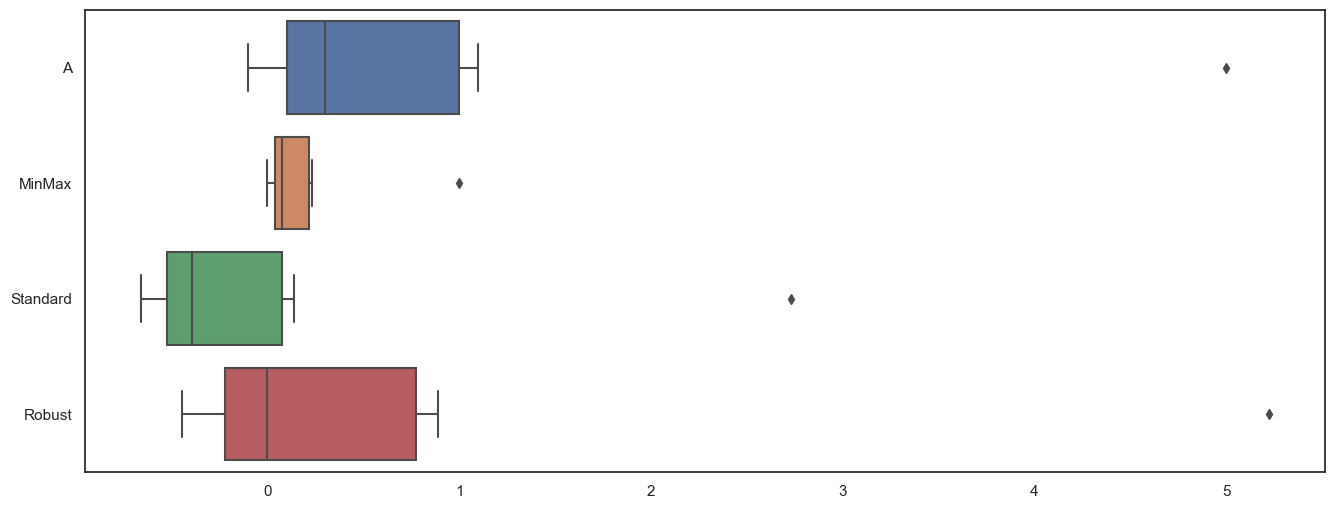

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style = 'white')
plt.figure(figsize = (16,6))
sns.boxplot(data = df_scaler, orient='h')

원본 데이터에 이상치가 존재한 것으로 보인다. (5)

각 스케일러의 특징을 살펴보자..

1. MinMax : 최소값을 0으로 최대값을 1로 만들어준다. 이런 특성 때문에 이상치의 영향을 많이 받는다.

2. Standard : 평균을 0으로 만들어준다. 이런 특성 떄문에 이상치의 영향을 많이 받는다.

3. Robust : 중앙값을 0으로 $Q_3 - Q_1$을 1로 만들어준다. 따라서 위의 두 스케일러보단 이상치의 영향을 덜 받아 데이터의 밀집도가 원 데이터랑 비슷하다는 특징이 있다.

# 와인 데이터 분석

와인 데이터를 입력받아 레드 와인인지 화이트 와인인지 분류해보자.

In [25]:
# 데이터 읽기

import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep = ';')
white_wine = pd.read_csv(white_url, sep = ';')

In [26]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [28]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [29]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

두 데이터의 구조는 동일하다.

두 데이터를 하나의 데이터프레임으로 합치고자 하는데, red wine과 white wine을 구분할 수 있는 컬럼을 추가하고 하나의 데이터프레임으로 합쳐보자.

In [30]:
# 와인 색상 구분 컬럼
red_wine['color'] = 1
white_wine['color'] = 0

# 두 데이터 합치기
wine = pd.concat([red_wine, white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [31]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [32]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [33]:
import plotly_express as px

fig = px.histogram(wine, x = 'quality')
fig.show()

5,6,7 등급의 와인들이 많은 것으로 보인다.

그러면 레드, 화이트 와인별 등급 분포는 어떠할까?

In [35]:
fig = px.histogram(wine, x = 'quality', color = 'color' , color_discrete_sequence = px.colors.qualitative.Pastel1)
fig.show()

레드 와인의 비율이 화이트 와인의 비율에 비해 많이 적지만 둘 다 5, 6등급의 와인의 비중이 많은 것으로 보인다.

## 레드/화이트 와인 분류기

In [36]:
X = wine.drop(['color'], axis=1)
y = wine['color'] # 타겟 데이터

# 학습용 / 테스트용 데이터 분리
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
# 데이터에 무엇이 들어가있고, 각각의 개수가 얼만큼 있는지 확인 가능
np.unique(y_train, return_counts=True) 

(array([0, 1], dtype=int64), array([3913, 1284], dtype=int64))

In [37]:
# 훈련용과 테스트용이 레드/화이트 와인에 따라 어느정도 구분되었을까

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x = X_train['quality'], name = 'Train'))
fig.add_trace(go.Histogram(x = X_test['quality'], name = 'Test'))

fig.update_layout(barmode = 'overlay') # overlay
fig.update_traces(opacity = 0.75) # 투명도

fig.show()

나름대로 각 등급별 비중이 Train과 Test셋에 고르게 분포되어있는 것 같다

In [39]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train) # 학습

DecisionTreeClassifier(max_depth=2, random_state=13)

In [40]:
# Train/Test 데이터에 대한 성능을 평가해보자
from sklearn.metrics import accuracy_score

# 예측
y_pred_tr = wine_tree.predict(X_train) 
y_pred_test = wine_tree.predict(X_test) 

# 성능
accuracy_score(y_train, y_pred_tr), accuracy_score(y_test, y_pred_test)

(0.9553588608812776, 0.9569230769230769)

이번 시간에 배운 전처리를 더 활용해보자.

DecisionTree 모델은 이번에 배운 스케일러를 한다고 성능이 크게 달라지진 않지만, 한 번 느낌만 살펴보자!

In [41]:
# 와인 데이터의 몇 개 컬럼의 boxplot

fig = go.Figure()
fig.add_trace(go.Box(y = X['fixed acidity'], name = 'fixed acidity'))
fig.add_trace(go.Box(y = X['chlorides'], name = 'chlorides'))
fig.add_trace(go.Box(y = X['quality'], name = 'quality'))

fig.show()

각 컬럼들의 데이터 분포를 살펴보았는데 컬럼 간 데이터의 분포의 격차가 좀 커보인다. 

이런 경우, 학습이 제대로 안 될 수도 있다.
그래서 스케일러를 하는 것이다.

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()
ss = StandardScaler()

ss.fit(X)
mms.fit(X)

X_ss = ss.transform(X)
X_mms = mms.transform(X)

X_ss_pd = pd.DataFrame(X_ss, columns = X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns = X.columns)

앞서 말했다시피 DecisionTree에서 스케일러는 큰 성능을 가져오지 않는다.

주로 Cost Function을 최적화할 때 유효할 떄가 있다..!

두 스케일러 중 어떤 것이 효과적인지는 확인해보아야한다 :)

In [44]:
# ss 분포

fig = go.Figure()
fig.add_trace(go.Box(y = X_ss_pd['fixed acidity'], name = 'fixed acidity'))
fig.add_trace(go.Box(y = X_ss_pd['chlorides'], name = 'chlorides'))
fig.add_trace(go.Box(y = X_ss_pd['quality'], name = 'quality'))

fig.show()

In [45]:
# mms 분포

fig = go.Figure()
fig.add_trace(go.Box(y = X_mms_pd['fixed acidity'], name = 'fixed acidity'))
fig.add_trace(go.Box(y = X_mms_pd['chlorides'], name = 'chlorides'))
fig.add_trace(go.Box(y = X_mms_pd['quality'], name = 'quality'))

fig.show()

In [46]:
# SS를 적용한 Decision Tree

# 학습용 / 테스트용 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ss_pd, y, test_size=0.2, random_state=13)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train) # 학습

# 예측
y_pred_tr = wine_tree.predict(X_train) 
y_pred_test = wine_tree.predict(X_test) 

# 성능
accuracy_score(y_train, y_pred_tr), accuracy_score(y_test, y_pred_test)

(0.9553588608812776, 0.9569230769230769)

In [47]:
# MMS를 적용한 Decision Tree

# 학습용 / 테스트용 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size=0.2, random_state=13)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train) # 학습

# 예측
y_pred_tr = wine_tree.predict(X_train) 
y_pred_test = wine_tree.predict(X_test) 

# 성능
accuracy_score(y_train, y_pred_tr), accuracy_score(y_test, y_pred_test)

(0.9553588608812776, 0.9569230769230769)

성능은 크게 차이나지 않는다.

이 모델들은 레드/화이트 와인을 어떻게 구분할까?

[Text(0.5, 0.8333333333333334, 'total sulfur dioxide <= 0.142\ngini = 0.372\nsamples = 5197\nvalue = [3913, 1284]'),
 Text(0.25, 0.5, 'chlorides <= 0.062\ngini = 0.183\nsamples = 1128\nvalue = [115, 1013]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.201\nsamples = 115\nvalue = [102, 13]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.025\nsamples = 1013\nvalue = [13, 1000]'),
 Text(0.75, 0.5, 'chlorides <= 0.1\ngini = 0.124\nsamples = 4069\nvalue = [3798, 271]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.022\nsamples = 3674\nvalue = [3633, 41]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.486\nsamples = 395\nvalue = [165, 230]')]

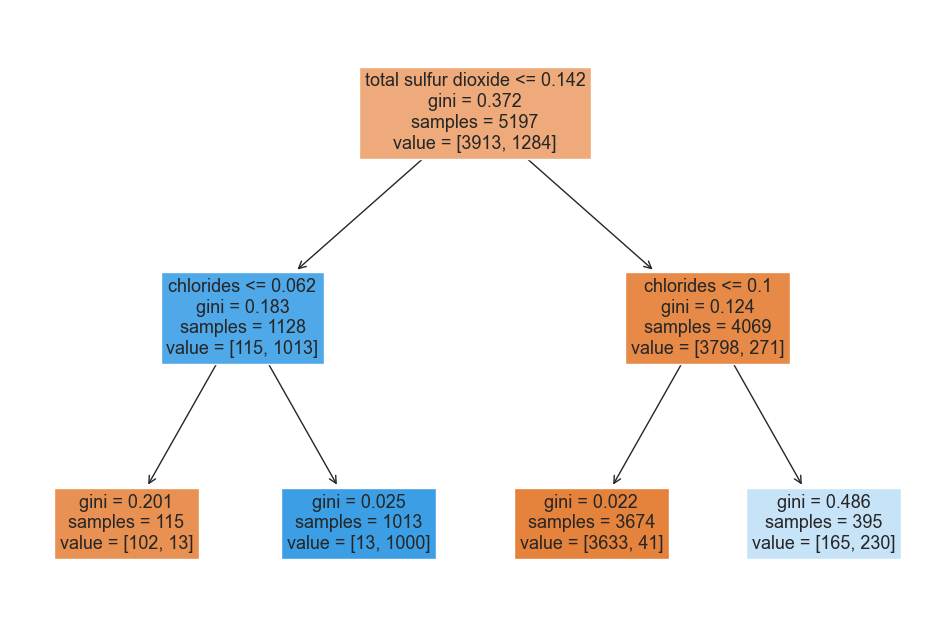

In [50]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(wine_tree, feature_names = X_train.columns, filled= True)

위 분류기의 첫번째 구분 기준이 'total sulfur dioxide'인 것으로 보아 레드/화이트 와인을 구분하는데 중요한 역할을 하는 것 같다!

In [51]:
# 중요도를 추출할 수도 있음
dict(zip(X_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

### 와인 맛에 대한 이진 분류

In [52]:
# quality 컬럼을 이진화

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
 13  taste                 6497 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 761.4 KB


In [53]:
wine['taste'].unique()

array([0., 1.])

In [54]:
X = wine.drop(['taste'], axis=1)
y = wine['taste'] # 타겟 데이터

# 학습용 / 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# 학습
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

# 예측
y_pred_tr = wine_tree.predict(X_train) 
y_pred_test = wine_tree.predict(X_test) 

# 성능
accuracy_score(y_train, y_pred_tr), accuracy_score(y_test, y_pred_test)

(1.0, 1.0)

100% 로 분류?? 어떻게 이럴 수 있을까.

우리는 'quality' 컬럼으로 'taste' 컬럼을 생성했다. 그러므로 X 데이터에서 'quality' 컬럼 또한 삭제해주어야한다.

In [55]:
X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste'] # 타겟 데이터

# 학습용 / 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# 학습
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

# 예측
y_pred_tr = wine_tree.predict(X_train) 
y_pred_test = wine_tree.predict(X_test) 

# 성능
accuracy_score(y_train, y_pred_tr), accuracy_score(y_test, y_pred_test)

(0.7294593034442948, 0.7161538461538461)

[Text(0.5, 0.8333333333333334, 'alcohol <= 10.525\ngini = 0.465\nsamples = 5197\nvalue = [1907, 3290]'),
 Text(0.25, 0.5, 'volatile acidity <= 0.237\ngini = 0.499\nsamples = 2950\nvalue = [1546, 1404]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.397\nsamples = 791\nvalue = [216, 575]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.473\nsamples = 2159\nvalue = [1330, 829]'),
 Text(0.75, 0.5, 'free sulfur dioxide <= 13.5\ngini = 0.27\nsamples = 2247\nvalue = [361, 1886]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.439\nsamples = 427\nvalue = [139, 288]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.214\nsamples = 1820\nvalue = [222, 1598]')]

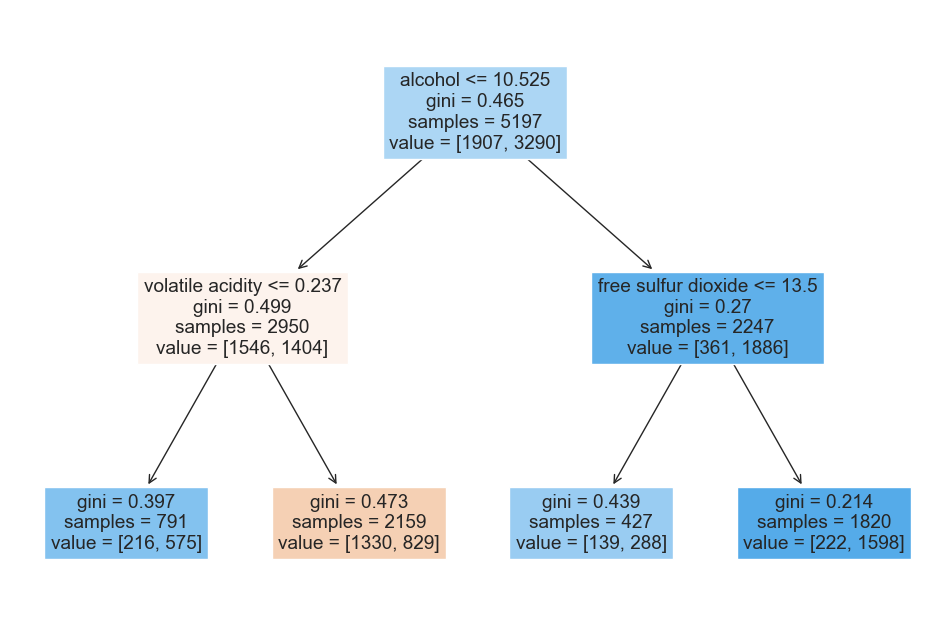

In [56]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(wine_tree, feature_names = X_train.columns, filled= True)

와인이 맛있다는 기준은 여러가지이겠지만, 지금 가지고 있는 데이터를 통해 알 수 있는 와인이 맛있다 의 기준은 위와 같다.